In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

#Combining both datasets for EDA

In [2]:
test=pd.read_csv('SalaryData_Test(1).csv')
train=pd.read_csv('SalaryData_Train(1).csv')

In [4]:
cmplt=pd.concat([test,train])

cmplt.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
cmplt.drop(columns=['educationno','relationship','race','sex','native'],axis=1,inplace=True)

In [6]:
cmplt.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'capitalgain', 'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [7]:
cmplt.nunique()

age               74
workclass          7
education         16
maritalstatus      7
occupation        14
capitalgain      121
capitalloss       97
hoursperweek      96
Salary             2
dtype: int64

In [8]:
cmplt.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
capitalgain      0
capitalloss      0
hoursperweek     0
Salary           0
dtype: int64

In [9]:
cmplt.head()
label_encoder = preprocessing.LabelEncoder()
cmplt['workclass']= label_encoder.fit_transform(cmplt['workclass']) 
cmplt['maritalstatus']=label_encoder.fit_transform(cmplt['maritalstatus'])
cmplt['education']=label_encoder.fit_transform(cmplt['education'])
cmplt['occupation']=label_encoder.fit_transform(cmplt['occupation'])
cmplt['Salary']=label_encoder.fit_transform(cmplt['Salary'])

In [10]:
cmplt.head()

,age,workclass,education,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,4,6,0,0,40,0
1,38,2,11,2,4,0,0,50,0
2,28,1,7,2,10,0,0,40,1
3,44,2,15,2,6,7688,0,40,1
4,34,2,0,4,7,0,0,30,0


In [11]:
cmplt['Salary'].nunique()

2

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (15060, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0

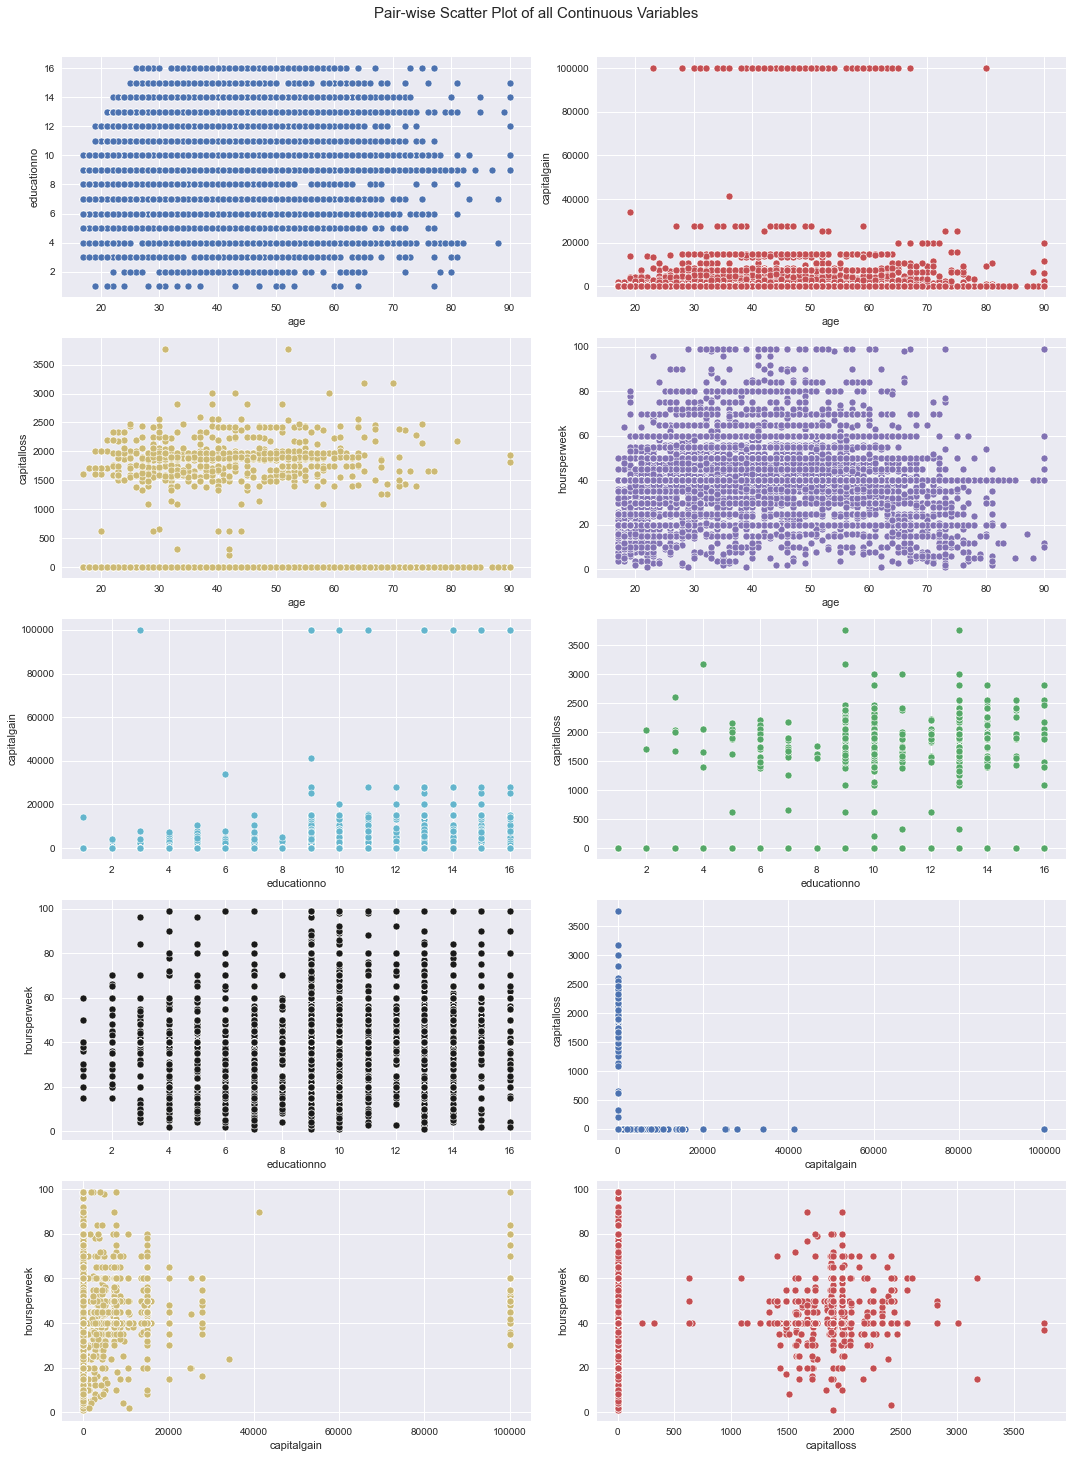

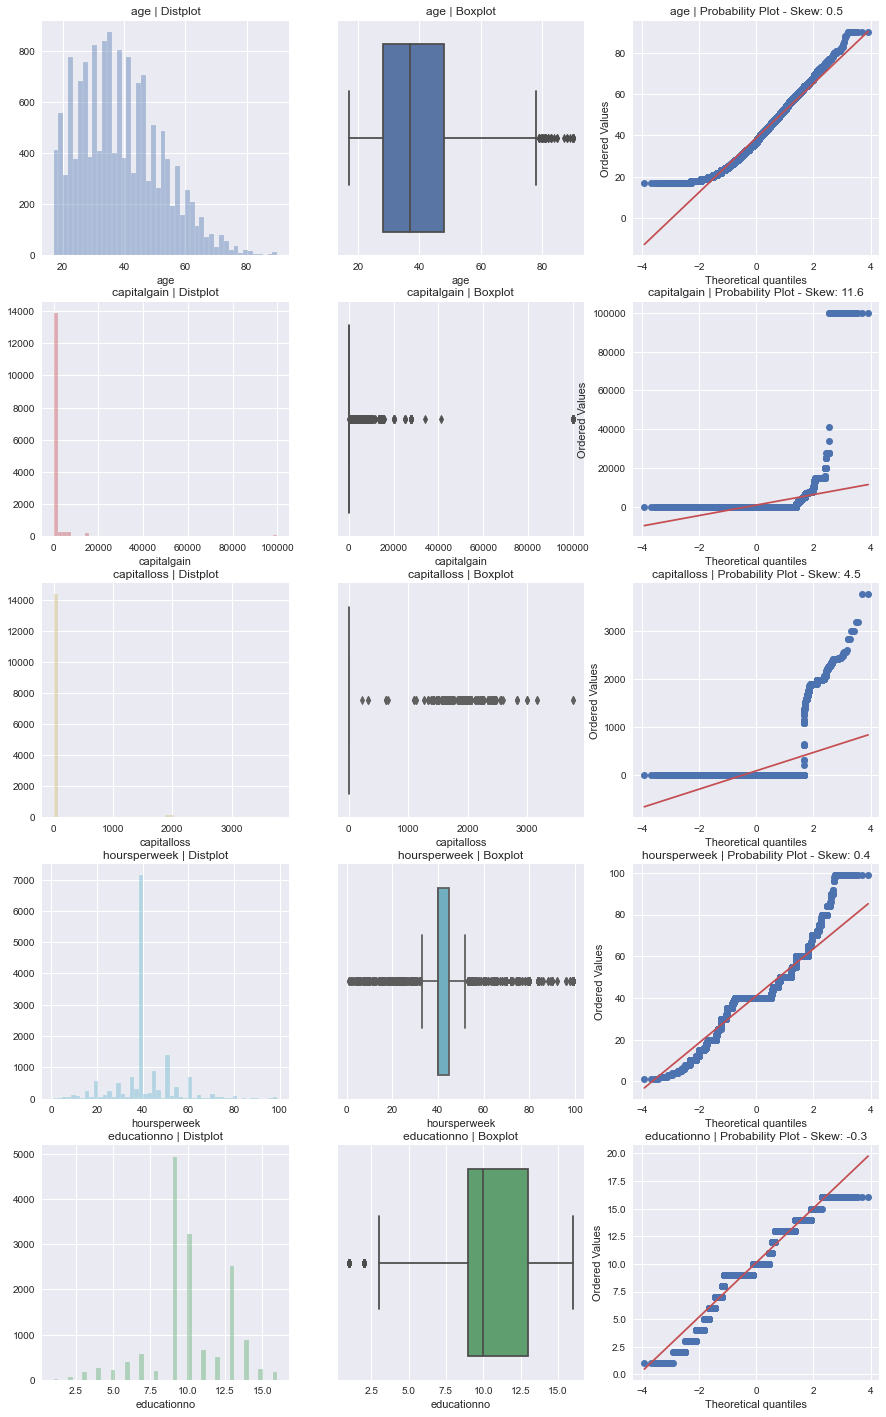

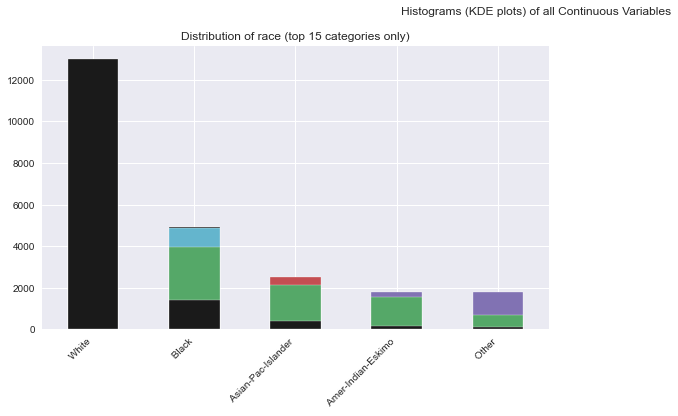

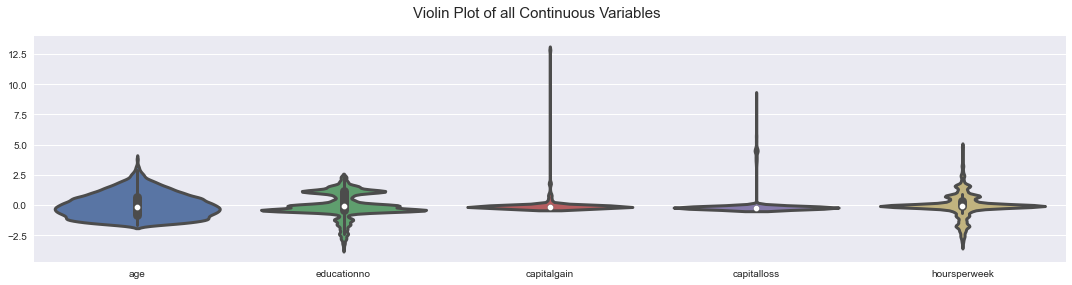

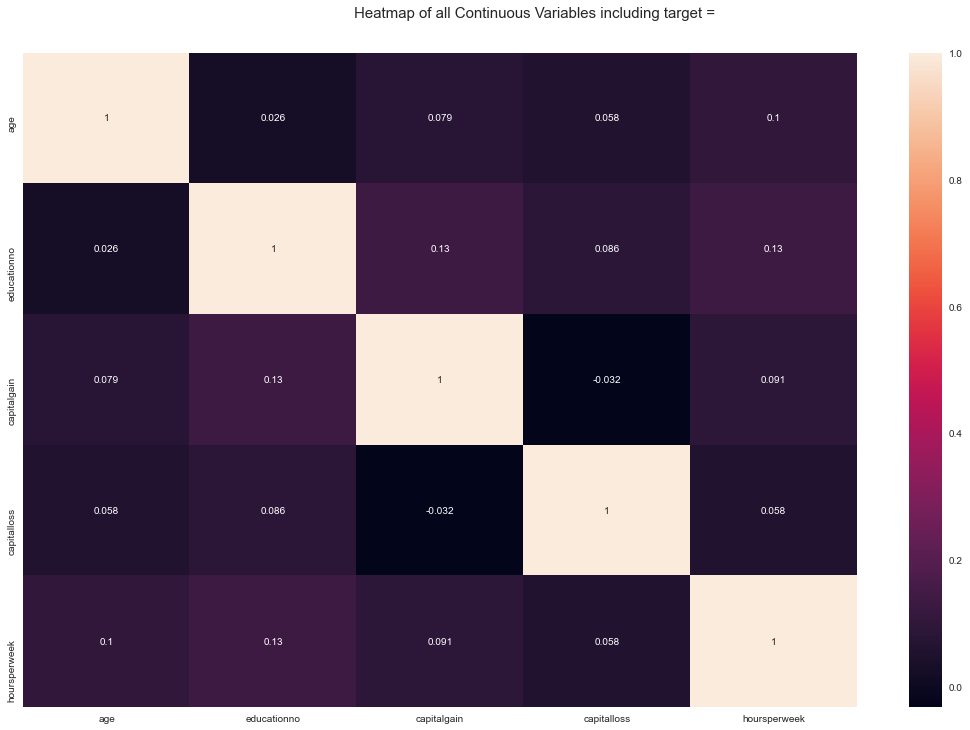

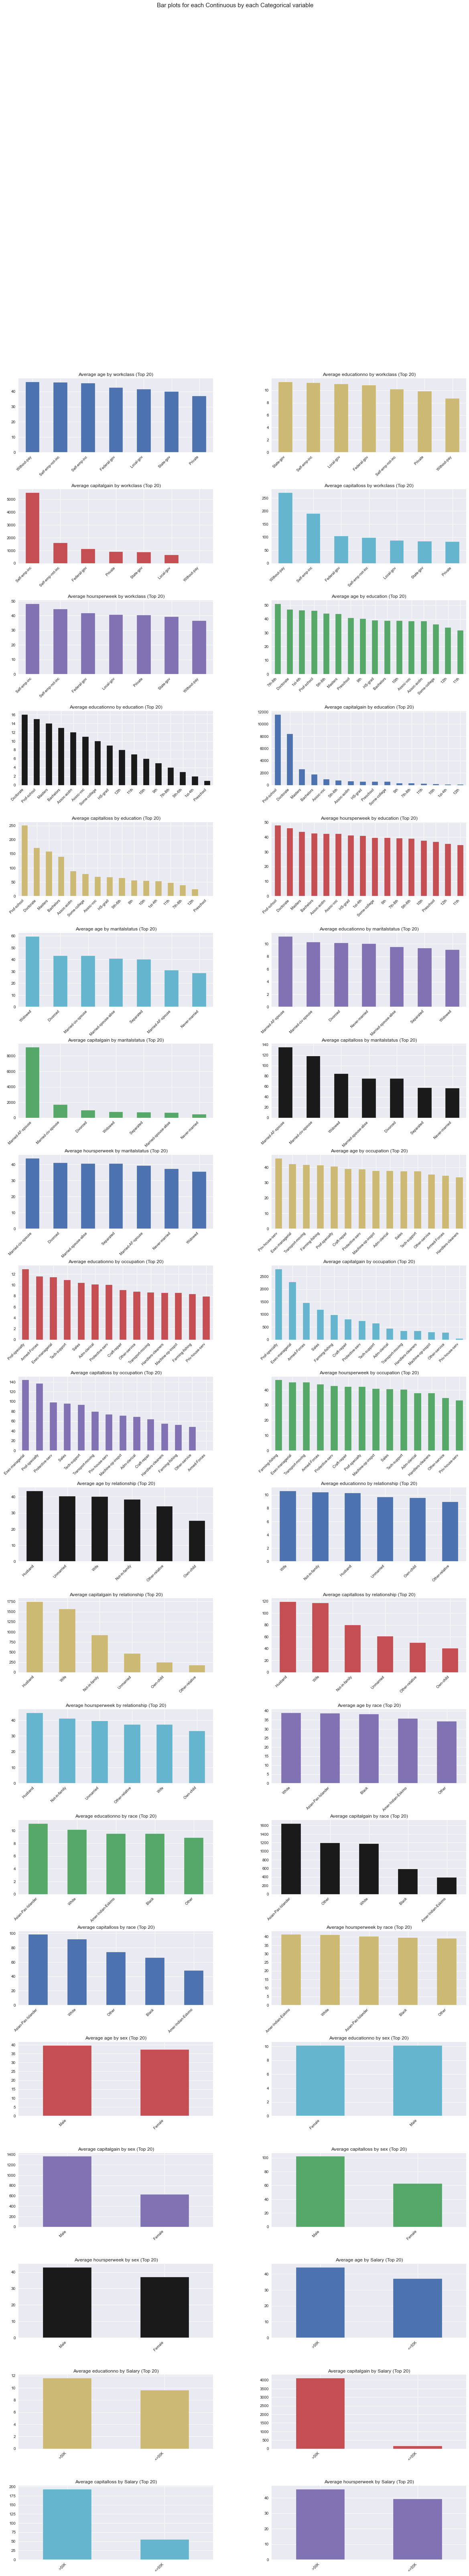

Time to run AutoViz (in seconds) = 24.475

 ###################### VISUALIZATION Completed ########################


In [13]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()
viz=AV.AutoViz('SalaryData_Test(1).csv')

Time to run AutoViz (in seconds) = 13.696

 ###################### VISUALIZATION Completed ########################

# Training my model using train data set

In [14]:
label_encoder = preprocessing.LabelEncoder()
train['workclass']= label_encoder.fit_transform(train['workclass']) 
train['maritalstatus']=label_encoder.fit_transform(train['maritalstatus'])
train['education']=label_encoder.fit_transform(train['education'])
train['occupation']=label_encoder.fit_transform(train['occupation'])
train['Salary']=label_encoder.fit_transform(train['Salary'])

In [19]:
#train.drop(columns=['educationno','relationship','race','sex','native'],axis=1,inplace=True)



In [20]:
train.head()

,age,workclass,education,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,4,0,2174,0,40,0
1,50,4,9,2,3,0,0,13,0
2,38,2,11,0,5,0,0,40,0
3,53,2,1,2,5,0,0,40,0
4,28,2,9,2,9,0,0,40,0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   maritalstatus  30161 non-null  int32
 4   occupation     30161 non-null  int32
 5   capitalgain    30161 non-null  int64
 6   capitalloss    30161 non-null  int64
 7   hoursperweek   30161 non-null  int64
 8   Salary         30161 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 1.5 MB


In [22]:
X=train.drop('Salary',axis=1)
y=train['Salary']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21112, 8), (9049, 8), (21112,), (9049,))

In [25]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [26]:
predictions = classifier.predict(X_test)

In [27]:
test.head()
label_encoder = preprocessing.LabelEncoder()
test['workclass']= label_encoder.fit_transform(test['workclass']) 
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['education']=label_encoder.fit_transform(test['education'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

In [28]:
test.drop(columns=['educationno','relationship','race','sex','native'],axis=1,inplace=True)
test.head()

,age,workclass,education,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,4,6,0,0,40,0
1,38,2,11,2,4,0,0,50,0
2,28,1,7,2,10,0,0,40,1
3,44,2,15,2,6,7688,0,40,1
4,34,2,0,4,7,0,0,30,0


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   maritalstatus  15060 non-null  int32
 4   occupation     15060 non-null  int32
 5   capitalgain    15060 non-null  int64
 6   capitalloss    15060 non-null  int64
 7   hoursperweek   15060 non-null  int64
 8   Salary         15060 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 764.9 KB


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7942314067852801

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y_test,predictions)
print (confusion_matrix)
print('Accuracy',accuracy_score(y_test,predictions))

[[6549  309]
 [1553  638]]
Accuracy 0.7942314067852801


In [32]:
x=test.drop('Salary',axis=1)
y=test['Salary']

In [34]:
x.shape,y.shape

((15060, 8), (15060,))

In [35]:
y_pred = classifier.predict(x)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.7922974767596281

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)
print('Accuracy',accuracy_score(y,y_pred))

[[10893   467]
 [ 2661  1039]]
Accuracy 0.7922974767596281


In [38]:
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)

print(score)

0.8024091059785612


# Testing my test dataset without train test split because the whole dataset is not seen by my model

In [39]:
test.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'capitalgain', 'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [41]:
test.shape

(15060, 9)

In [42]:
test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [43]:
test.head(2)

,age,workclass,education,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,4,6,0,0,40,0
1,38,2,11,2,4,0,0,50,0


In [44]:
test.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'capitalgain', 'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [45]:
test.head(2)

,age,workclass,education,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,4,6,0,0,40,0
1,38,2,11,2,4,0,0,50,0


In [47]:
test.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
capitalgain      0
capitalloss      0
hoursperweek     0
Salary           0
dtype: int64

In [48]:
test.head()
label_encoder = preprocessing.LabelEncoder()
test['workclass']= label_encoder.fit_transform(test['workclass']) 
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['education']=label_encoder.fit_transform(test['education'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

In [49]:
test.head()

,age,workclass,education,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,4,6,0,0,40,0
1,38,2,11,2,4,0,0,50,0
2,28,1,7,2,10,0,0,40,1
3,44,2,15,2,6,7688,0,40,1
4,34,2,0,4,7,0,0,30,0


In [50]:
x=test.drop('Salary',axis=1)
y=test['Salary']

In [56]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [57]:
y_pred = classifier.predict(x)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.7930942895086321

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)
print('Accuracy',accuracy_score(y,y_pred))

[[10917   443]
 [ 2673  1027]]
Accuracy 0.7930942895086321


In [55]:
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(x,y)

# Predicting the result and giving the accuracy
score = classifier.score(x,y)

print(score)

0.7964143426294821


In [63]:
X=cmplt.drop('Salary',axis=1)
Y=cmplt['Salary']

In [64]:
cmplt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 30160
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int32
 2   education      45221 non-null  int32
 3   maritalstatus  45221 non-null  int32
 4   occupation     45221 non-null  int32
 5   capitalgain    45221 non-null  int64
 6   capitalloss    45221 non-null  int64
 7   hoursperweek   45221 non-null  int64
 8   Salary         45221 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 2.6 MB


In [65]:
y_pred = classifier.predict(X)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, y_pred)

0.7918444970257181

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
print('Accuracy',accuracy_score(Y,y_pred))

[[32676  1337]
 [ 8076  3132]]
Accuracy 0.7918444970257181


In [68]:
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X,Y)

# Predicting the result and giving the accuracy
score = classifier.score(X,Y)

print(score)

0.796399902700073


Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters. As we have huge dataset we cannot do grid search but we can manually tweak hyperparameters to check accuracy of model

In [69]:
svc=SVC(kernel='rbf',C=100.0,gamma='auto') 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7807



Model accuracy score with rbf kernel and C=100.0 : 0.7782

In [70]:
svc1000=SVC( C=1000.0) 


# fit classifier to training set
svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8128


Model accuracy score with linear kernel and C=100.0 : 0.7989

In [71]:
svc=SVC(kernel='rbf',C=100.0) 

# fit classifier to training set
svc.fit(X,Y)

# make predictions on test set
y_pred=svc.predict(X)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8059


Model accuracy score with rbf kernel and C=100.0 : 0.9493

In [72]:
svc=SVC(kernel='rbf',C=100.0,gamma='auto') 

# fit classifier to training set
svc.fit(x,y)

# make predictions on test set
y_pred=svc.predict(x)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9685


Model accuracy score with rbf kernel and C=100.0 : 0.9685

In [73]:
from sklearn import ensemble

# Creating classifier Object
ada = ensemble.AdaBoostClassifier()
#Fitting the classifier to training data
ada.fit(X_train,y_train)

# Making Predictions
ada_pred = ada.predict(X_test)

print("Traing Score:%f"%ada.score(X_train,y_train))
print("Testing Score:%f"%ada.score(X_test,y_test))

Traing Score:0.855864
Testing Score:0.859100
